In [ ]:
from pint import UnitRegistry 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
u = UnitRegistry()

**Problema 1**


In [6]:
#declaracion de datos
td = 200*u('cGy/min')
f1 = 3*u('MeV')
f2 = 6*u('MeV')
f3 = 9*u('MeV')
um3 = 0.0397*u('cm**2/g')
um6 = 0.0277*u('cm**2/g')
um9 = 0.0232*u('cm**2/g')

*Inciso a:*

Calulamos la exposición sobre el detector y durante los 5 minutos

In [7]:
tx = td/(33.97*u('J/C'))
gamma_A = tx*100**2*u('cm**2')
tx_90 = gamma_A/(90**2*u('cm**2'))
print("Tasa de expo a 90 cm de la fuente:")
print(tx.to('roentgen/min'))
tx_h2o =(tx_90*np.exp(-10*(um3).magnitude)).to('roentgen/min')
print("La exposicion en el detector a los 5min sera:")
x = tx_h2o*5*u('min')
print(x)

Tasa de expo a 90 cm de la fuente:
228.1995285397741 roentgen / minute
La exposicion en el detector a los 5min sera:
947.0759732754368 roentgen


Ahora obtenemos las cargas considerando el volumen util de la camara y que el gas presente en ella es aire

In [8]:
V = 0.6*u('cm**3')
densidad_aire = 1.28*u('kg/m**3')
m = (V*densidad_aire).to('kg')
Q = x*m
print(Q.to('C'))

1.8765742164868818e-07 coulomb


La ionización se realiza en aire, entonces para los fotones de 3MeV


In [9]:
paresiones = f1.to('eV')/(33.97*u('eV'))
#print(paresiones)
nroe = Q.to('C')/(1.6*10**-19*u('C'))
#print(nroe)
nrofotones = nroe/paresiones
print("El nro de fotones detectados es: ",format(nrofotones.magnitude,'.3E'))

El nro de fotones detectados es:  1.328E+07


Extrapolamos para determinar la eficiencia y asi hallar la cantidad de fotones que llegan al detector

In [10]:
from scipy import interpolate
eficiencias = [2, 4] 
energias = [280,1332]
f = interpolate.interp1d(energias, eficiencias, fill_value = "extrapolate")
f(3000)

array(7.17110266)

Consideramos una eficiencia (máxima) del 7.17%, por lo que la cantidad de fotones que son emitidos es:

In [12]:
print("El nro de fotones que llegan a la fuente es de:")
print(format(100*nrofotones.magnitude/f(3000), '.3E'))

El nro de fotones que llegan a la fuente es de:
1.852E+08


*inciso b:*

Para determinar la dosis depostiada en la camara bajo las mismas condiciones, utilizamos la exposición obtenida en el inciso anterior y el factor de conversión a dosis, que para agua y 3MeV es de 0.971


In [13]:
#usando el factor 
fc = 0.971*u('cGy/roentgen')
D = fc*x
print("La dosis depositada en el detector durante 5min sera:", D)


La dosis depositada en el detector durante 5min sera: 919.6107700504491 centigray


**Problema 2**

*Inciso b*

Se determina la actividad para Co60, Mn54 y Cs137

In [17]:
def A(A0, t12, t):
    #para tiempo y t12 en mismas unidades
    A = A0*np.exp(-(np.log(2)/t12.magnitude)*t.magnitude)
    return A

A0_mn54 = 2.26*u('kBq')
A0_cs137 = 1.36*u('kBq')
A0_co60 = 3.17*u('kBq')
A0_co57 =0.53*u('kBq')
A0_cs134 =18.6*u('kBq')
A0_cd109 =53.11*u('kBq')
A0_am241 =1.17*u('kBq')
t12_co60 = 1925.28*u('days')
t12_cs137 = 30*365*u('days')
t12_mn54 = 312.2*u('days')
t12_co57 = 271*u('days')
t12_cd109 = 462*u('days')
t12_cs134 = 2.06*365*u('days')
t12_am241 = 432*365*u('days')
tiempo = 790*u('days')
A_mn54 = A(A0_mn54, t12_mn54, tiempo)
print("Actividad para el mn54:" , format(A_mn54))
A_co60 = A(A0_co60, t12_co60, tiempo)
print("Actividad para el co60: ",A_co60)
A_co57 = A(A0_co57, t12_co57, tiempo)
print("Actividad para el co57: ",A_co57)
A_cs137 = A(A0_cs137, t12_cs137, tiempo)
print("Actividad para el cs137: ", A_cs137)
A_cs134 = A(A0_cs134, t12_cs134, tiempo)
print("Actividad para el cs134: ", A_cs134)
A_am241= A(A0_am241, t12_am241, tiempo)
print("Actividad para el am241: ",A_am241)
A_cd109 = A(A0_cd109, t12_cd109, tiempo)
print("Actividad para el cd109: ", A_cd109)

Actividad para el mn54: 0.3911770294773732 kilobecquerel
Actividad para el co60:  2.3852705511822294 kilobecquerel
Actividad para el co57:  0.0702642724664404 kilobecquerel
Actividad para el cs137:  1.2936618248037466 kilobecquerel
Actividad para el cs134:  8.979026792103568 kilobecquerel
Actividad para el am241:  1.165943906863513 kilobecquerel
Actividad para el cd109:  16.234093405985007 kilobecquerel


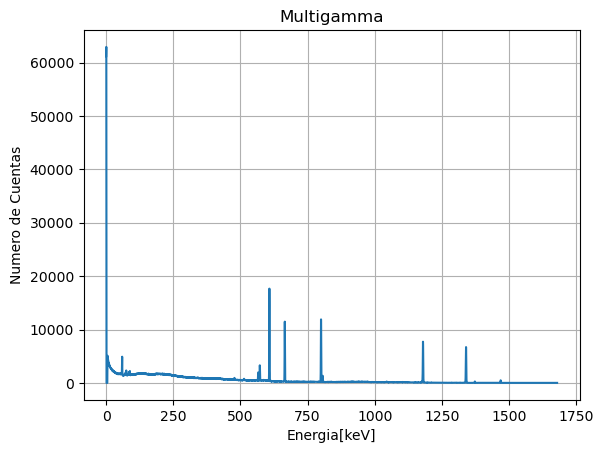

In [23]:
#Grafica del espectro
import pandas as pd
multigamma = pd.read_table("multigamma.txt", names =["Nro Ctas"])
multigamma
nrocanal = np.arange(0*0.41,4096*0.41,1*0.41)
fig, ax = plt.subplots()
ax.plot(nrocanal, multigamma["Nro Ctas"])
ax.set(xlabel='Energia[keV]', ylabel='Numero de Cuentas', title='Multigamma')
ax.grid()
plt.show()

*Inciso f*

Determino la cantidad de fotones que fueron emitidos

In [22]:
def nro_fotones(A, t, p):
    A = A.to('Bq')
    nro_f = A*t*p
    return nro_f.magnitude
t = 1200*u('seconds')
fotones_co60 = nro_fotones(A_co60, t, 1)/2
print("Para cada pico del Co60: ", fotones_co60)
fotones_mn54 = nro_fotones(A_mn54, t, 1)
print("Para el mn54: ", fotones_mn54)
fotones_cs137 = nro_fotones(A_cs137, t, 0.85)
print("Para el cs137: ", fotones_cs137)


Para cada pico del Co60:  1431162.3307093377
Para el mn54:  469412.43537284783
Para el cs137:  1319535.0612998216


Luego, consideramos el nro de cuentas y determinamos la eficiencia

In [23]:
ctas_cs137 = 11475
ctas_mn54 = 11898
ctas_co60_1 = 6711
ctas_co60_2 = 7721

ef_cs137 = ctas_cs137/fotones_cs137
ef_mn54 = ctas_mn54/fotones_mn54
ef_co60_1 = ctas_co60_1/fotones_co60
ef_co60_2 = ctas_co60_2/fotones_co60

print("Eficiencia para el mn54:", format(ef_mn54, '.3E'))
print("Eficiencia para el cs137:", format(ef_cs137, '.3E'))
print("Eficiencia para los fotones 1.3 MeV del Co60:", format(ef_co60_1, '.3E'))
print("Eficiencia para los fotones 1.17 MeV del Co60:", format(ef_co60_2, '.3E'))

Eficiencia para el mn54: 2.535E-02
Eficiencia para el cs137: 8.696E-03
Eficiencia para los fotones 1.3 MeV del Co60: 4.689E-03
Eficiencia para los fotones 1.17 MeV del Co60: 5.395E-03
